In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('data/additional/Depuracion(ventas unitarias).csv')
emissions = pd.read_csv('data/emissions/historical_emissions.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/data/emissions/historical_emissions.csv'

### a. Reducción de carga cognitiva

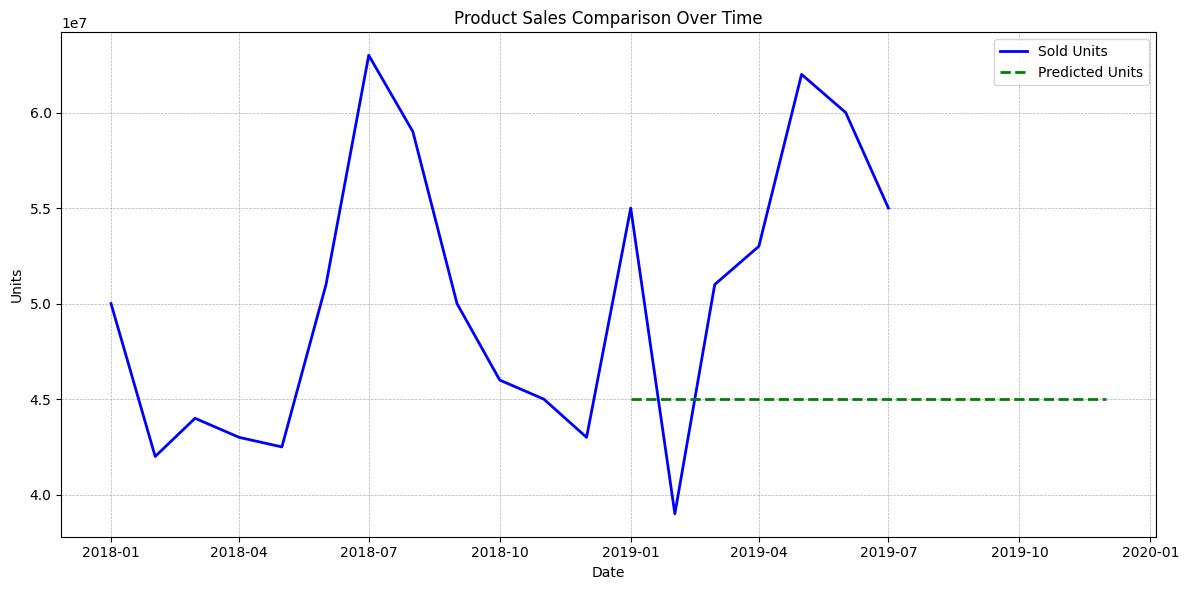

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

plt.figure(figsize=(12, 6))
plt.plot(sales['date'], sales['sold_units'], label='Sold Units', color='blue', linewidth=2)
plt.plot(sales['date'], sales['predicted_units'], label='Predicted Units', color='green', linestyle='--', linewidth=2)

plt.title('Product Sales Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


💡 Usar gráficos de líneas en lugar de barras reduce la carga cognitiva al presentar los datos de manera simplificada. Las líneas permiten comparar fácilmente las tendencias de las unidades vendidas a lo largo del tiempo. Una menor cantidad de líneas de cuadrícula y una presentación ordenada contribuyen a una visualización más limpia y comprensible.

### b. Cree una visualización que demuestre al menos dos principios de la Gestalt.

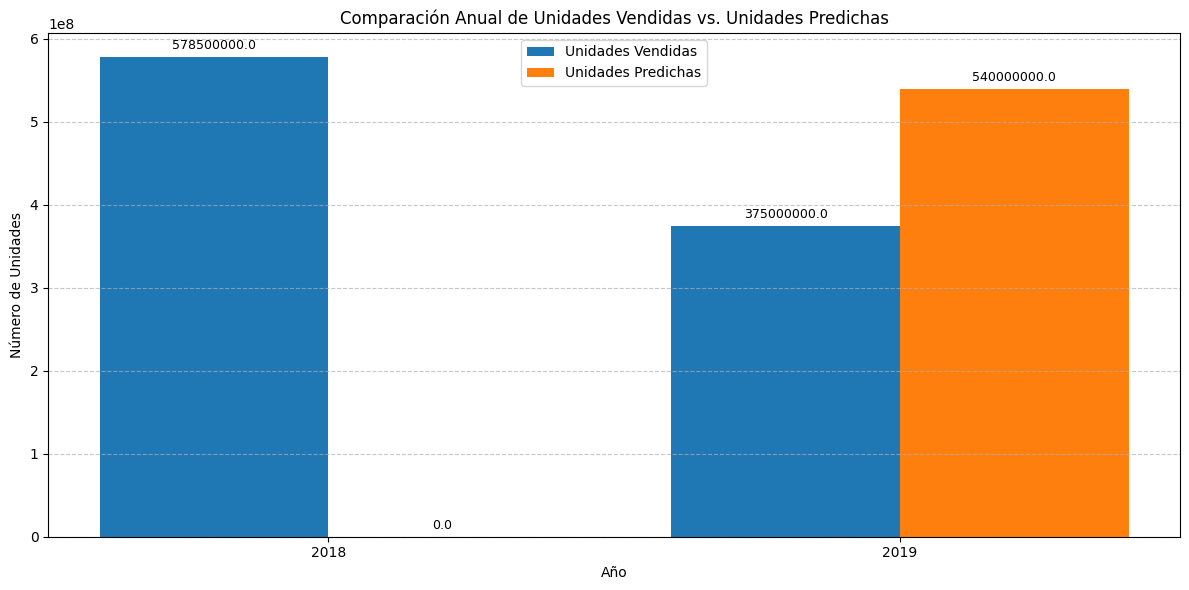

In [6]:
# Supongamos que ya tienes el DataFrame 'sales' configurado
sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

# Extraer el año de la fecha
sales['year'] = sales['date'].dt.year

# Agrupar los datos por año y sumar las unidades vendidas y predichas
sales_yearly = sales.groupby('year').agg({
    'sold_units': 'sum',
    'predicted_units': 'sum'
}).reset_index()

# Ordenar los datos por año
sales_yearly = sales_yearly.sort_values('year')

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Posición de las barras en el eje x
indices = np.arange(len(sales_yearly))
bar_width = 0.4

# Barras para unidades vendidas
plt.bar(indices - bar_width/2, sales_yearly['sold_units'], bar_width, label='Unidades Vendidas', color='#1f77b4')  # Azul más fuerte

# Barras para unidades predichas
plt.bar(indices + bar_width/2, sales_yearly['predicted_units'], bar_width, label='Unidades Predichas', color='#ff7f0e')  # Naranja más fuerte

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de Unidades')
plt.title('Comparación Anual de Unidades Vendidas vs. Unidades Predichas')
plt.xticks(indices, sales_yearly['year'], rotation=0)
plt.legend()

# Añadir etiquetas de valor encima de las barras
for i in indices:
    plt.text(i - bar_width/2, sales_yearly['sold_units'][i] + max(sales_yearly['sold_units']) * 0.01, 
             f"{sales_yearly['sold_units'][i]}", ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width/2, sales_yearly['predicted_units'][i] + max(sales_yearly['predicted_units']) * 0.01, 
             f"{sales_yearly['predicted_units'][i]}", ha='center', va='bottom', fontsize=9)

# Mejorar el diseño
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()